In [ ]:
#understanding dataset distribution for metrics later

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Load datasets and do basic pre-processing (missing values and encode categorical features)
x_values = pd.read_csv('features.csv')
y_values = pd.read_csv('labels.csv')
y = y_values['status_group']
X = x_values


# are the classes imbalanced
print("Class distribution in the dataset:")
print(y.value_counts())

print("\nClass balance (target variable):")
print(y.value_counts(normalize=True))


Class distribution in the dataset:
status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

Class balance (target variable):
status_group
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: proportion, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy For Linear Model No Feature Selection: 0.5546296296296296

Classification Report (Precision, Recall, F1-Score per class):


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                         precision    recall  f1-score   support

             functional       0.56      0.90      0.69      6437
         non functional       0.00      0.00      0.00       893
functional needs repair       0.53      0.17      0.26      4550

               accuracy                           0.55     11880
              macro avg       0.36      0.36      0.32     11880
           weighted avg       0.51      0.55      0.47     11880



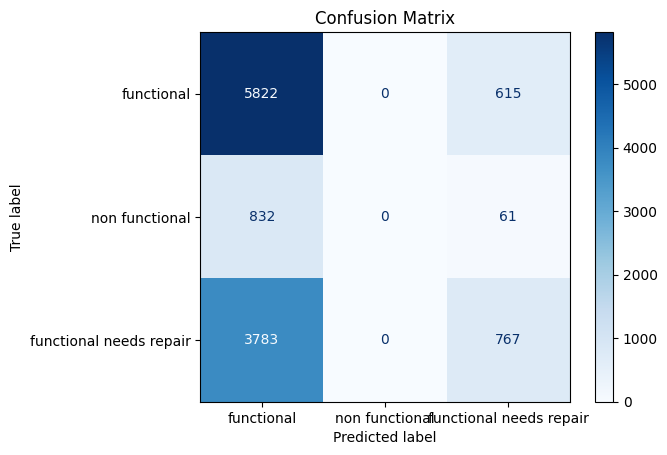

In [ ]:
#baseline linear model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

#Load datasets and do basic pre-processing (missing values and encode categorical features)
x_values = pd.read_csv('features.csv')
y_values = pd.read_csv('labels.csv')
y = y_values['status_group']
X = x_values

# continuous verse categorical features
continous_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# fill missing values with mean and mode
continous_imputer = SimpleImputer(strategy='mean')
X[continous_features] = continous_imputer.fit_transform(X[continous_features])

categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

# encode categorical features
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[categorical_features] = encoder.fit_transform(X[categorical_features])

# make test and train data - 20 percent test and 80 percent train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# run random forest model
complex_classifier = LogisticRegression()
complex_classifier.fit(X_train, y_train)
y_pred = complex_classifier.predict(X_test)

# acurracy results on test
print("Accuracy For Linear Model No Feature Selection:", accuracy_score(y_test, y_pred))


#Detailed classification report (precision, recall, F1-score per class)
print("\nClassification Report (Precision, Recall, F1-Score per class):")
print(classification_report(y_test, y_pred, target_names=['functional', 'non functional', 'functional needs repair']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['functional', 'non functional', 'functional needs repair'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Accuracy For Complex Model No Feature Selection: 0.7993265993265993

Classification Report (Precision, Recall, F1-Score per class):
                         precision    recall  f1-score   support

             functional       0.76      0.94      0.84      6495
         non functional       0.77      0.20      0.32       869
functional needs repair       0.88      0.71      0.78      4516

               accuracy                           0.80     11880
              macro avg       0.80      0.62      0.65     11880
           weighted avg       0.81      0.80      0.78     11880



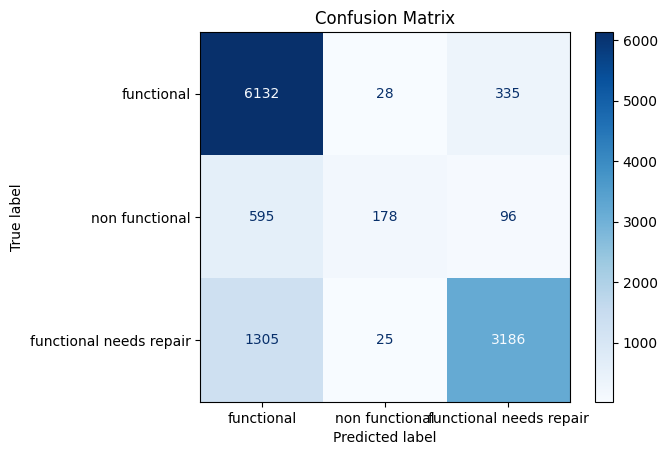

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Part 1: No feature selection and Complex Model

#Load datasets and do basic pre-processing (missing values and encode categorical features)
x_values = pd.read_csv('features.csv')
y_values = pd.read_csv('labels.csv')
y = y_values['status_group']
X = x_values

# continuous verse categorical features
continous_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# fill missing values with mean and mode
continous_imputer = SimpleImputer(strategy='mean')
X[continous_features] = continous_imputer.fit_transform(X[continous_features])

categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

# encode categorical features
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[categorical_features] = encoder.fit_transform(X[categorical_features])

# make test and train data - 20 percent test and 80 percent train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# run random forest model
complex_classifier = RandomForestClassifier(n_estimators=50, max_depth=15)
complex_classifier.fit(X_train, y_train)
y_pred = complex_classifier.predict(X_test)

# acurracy results on test
print("Accuracy For Complex Model No Feature Selection:", accuracy_score(y_test, y_pred))


#Detailed classification report (precision, recall, F1-score per class)
print("\nClassification Report (Precision, Recall, F1-Score per class):")
print(classification_report(y_test, y_pred, target_names=['functional', 'non functional', 'functional needs repair']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['functional', 'non functional', 'functional needs repair'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif

#Part 2: Feature selection and Linear Model

#simple data preprocessing
# load dataset + split continous and categorical features + remove irrelivant features
x_values = pd.read_csv('features.csv')
y_values = pd.read_csv('labels.csv')
y = y_values['status_group']
X = x_values

#numerical vs categorical columns
continous_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#specically handle date
if 'date_recorded' in X.columns:
    X['date_recorded'] = pd.to_datetime(X['date_recorded'])
    X['date_recorded'] = (X['date_recorded'] - X['date_recorded'].min()).dt.days

# remove unnessary data
outlier_columns = ['wpt_name', 'funder', 'installer', 'recorded_by', 'scheme_name', 'scheme_management', 'extraction_type_group', 'management_group', 'payment_type', 'source_class', 'waterpoint_type_group']
X = X.drop(columns=outlier_columns)

categorical_features = X.select_dtypes(include=['object']).columns

# add missing values for each type
continous_imputer = SimpleImputer(strategy='mean')
X[continous_features] = continous_imputer.fit_transform(X[continous_features])

categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

# encode the categorical variables
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X[categorical_features] = encoder.fit_transform(X[categorical_features])

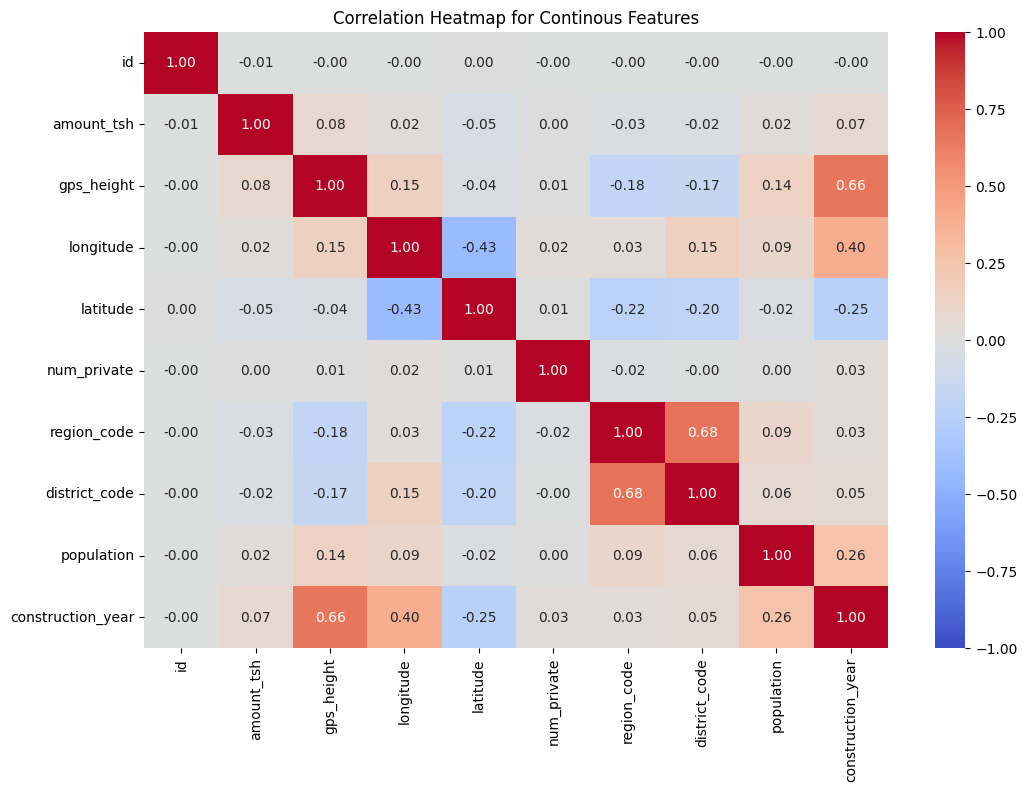

Removed highly correlated features: {'latitude', 'gps_height', 'construction_year', 'longitude', 'region_code', 'district_code'}
Remaining features after removing correlations: ['id', 'amount_tsh', 'date_recorded', 'num_private', 'basin', 'subvillage', 'region', 'lga', 'ward', 'population', 'public_meeting', 'permit', 'extraction_type', 'extraction_type_class', 'management', 'payment', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'waterpoint_type']


In [ ]:

#visualize continous features through heatmap and select

# use for heatmap
correlation_matrix = X[continous_features].corr()

#Reference to AI for heatmap generation/plot
# plot the map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Continous Features')
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()


# selected highly correlation features to drop
high_correlation_remove = set()

# loop through correlation matrix (only top triangle)
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        corr_value = abs(correlation_matrix.iloc[i, j])

        #if meet 0.3 threshold then remove
        if corr_value > 0.3:
            high_correlation_remove.add(correlation_matrix.columns[i])
            high_correlation_remove.add(correlation_matrix.columns[j])

# remove the selected featues
print(f"Removed highly correlated features: {high_correlation_remove}")

# print currect set of features
X_dropped_corr = X.drop(columns=high_correlation_remove)
print(f"Remaining features after removing correlations: {X_dropped_corr.columns.tolist()}")



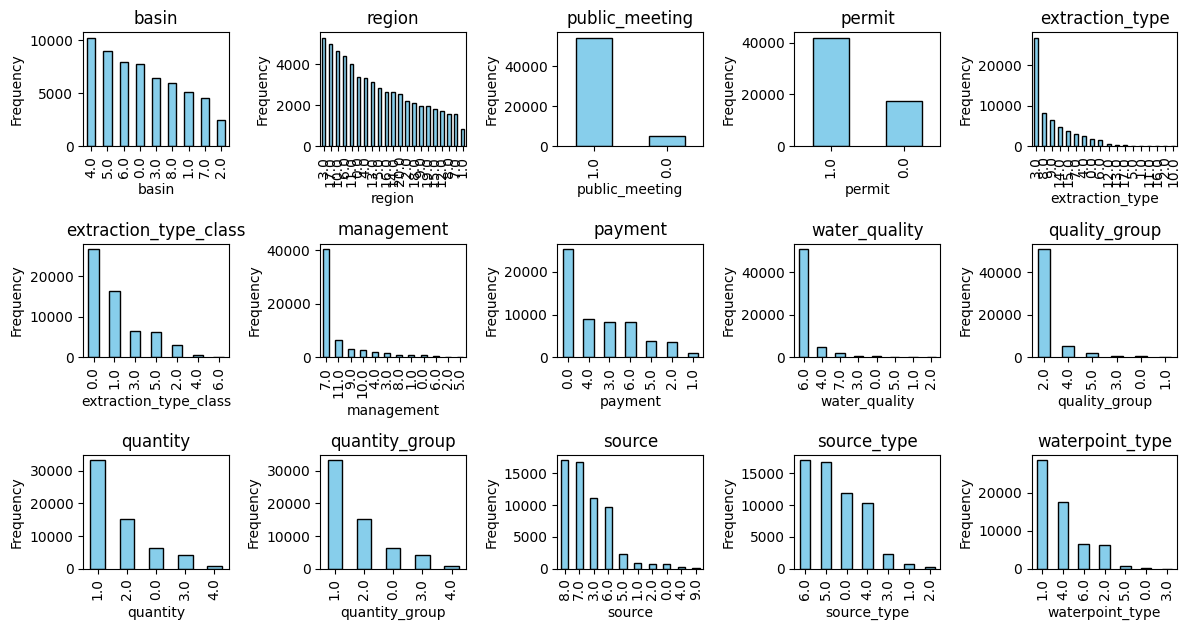

Removed low variance features: {'public_meeting', 'permit', 'water_quality'}
Remaining features after low variance: ['basin', 'subvillage', 'region', 'lga', 'ward', 'extraction_type', 'extraction_type_class', 'management', 'payment', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'waterpoint_type']


In [ ]:
#histograms for categorical features and remove low variance features

# remove these too high variance categorical features - hard to see histograms for them
hard_to_graph_features = ['subvillage', 'lga', 'ward']

updated_categorical_features = []
for feature in categorical_features:
    if feature not in hard_to_graph_features:
        updated_categorical_features.append(feature)

#Reference to AI for plot
# plot histograms
plt.figure(figsize=(12, 8))

for i, feature in enumerate(updated_categorical_features):
    plt.subplot(4, 5, i + 1)
    X[feature].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"{feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('histogram.png', bbox_inches='tight')
plt.show()


# visually see we want to remove low variance features like 'public_meeting', 'permit', 'water_quality'
low_variance_must_drop = {'public_meeting', 'permit', 'water_quality'}

categorical_features_final = []
for feature in categorical_features:
    if feature not in low_variance_must_drop:
        categorical_features_final.append(feature)

print(f"Removed low variance features: {low_variance_must_drop}")
print(f"Remaining features after low variance: {categorical_features_final}")

# update the final x values
X_final = X_dropped_corr[categorical_features_final]


In [ ]:

#final part select the top 10 features using SelectKBest

#reference to AI for selectKBest syntax
selector = SelectKBest(f_classif, k=10)
X_top_k = selector.fit_transform(X_final, y)
top_k_features = X_final.columns[selector.get_support(indices=True)]
print(f"Remaining top 10 features:", top_k_features.tolist())

# scale final 10 features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top_k)

# create train and test features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# run linear model
linear_model = LogisticRegression()

linear_model.fit(X_train, y_train)

# get accuracy
y_pred = linear_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#results
print(f"Accuracy of Logistic Regression model With Feature Selection: {accuracy:.4f}")


#Detailed classification report (precision, recall, F1-score per class)
print("\nClassification Report (Precision, Recall, F1-Score per class):")
report = classification_report(y_test, y_pred, zero_division=0)

print(report)

Remaining top 10 features: ['region', 'lga', 'extraction_type', 'extraction_type_class', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'waterpoint_type']
Accuracy of Logistic Regression model With Feature Selection: 0.6250

Classification Report (Precision, Recall, F1-Score per class):
                         precision    recall  f1-score   support

             functional       0.62      0.84      0.71      6457
functional needs repair       0.00      0.00      0.00       851
         non functional       0.64      0.43      0.52      4572

               accuracy                           0.62     11880
              macro avg       0.42      0.43      0.41     11880
           weighted avg       0.58      0.62      0.59     11880



Features used after scaling:
['region_1.0', 'region_2.0', 'region_3.0', 'region_4.0', 'region_5.0', 'region_6.0', 'region_7.0', 'region_8.0', 'region_9.0', 'region_10.0', 'region_11.0', 'region_12.0', 'region_13.0', 'region_14.0', 'region_15.0', 'region_16.0', 'region_17.0', 'region_18.0', 'region_19.0', 'region_20.0', 'lga_1.0', 'lga_2.0', 'lga_3.0', 'lga_4.0', 'lga_5.0', 'lga_6.0', 'lga_7.0', 'lga_8.0', 'lga_9.0', 'lga_10.0', 'lga_11.0', 'lga_12.0', 'lga_13.0', 'lga_14.0', 'lga_15.0', 'lga_16.0', 'lga_17.0', 'lga_18.0', 'lga_19.0', 'lga_20.0', 'lga_21.0', 'lga_22.0', 'lga_23.0', 'lga_24.0', 'lga_25.0', 'lga_26.0', 'lga_27.0', 'lga_28.0', 'lga_29.0', 'lga_30.0', 'lga_31.0', 'lga_32.0', 'lga_33.0', 'lga_34.0', 'lga_35.0', 'lga_36.0', 'lga_37.0', 'lga_38.0', 'lga_39.0', 'lga_40.0', 'lga_41.0', 'lga_42.0', 'lga_43.0', 'lga_44.0', 'lga_45.0', 'lga_46.0', 'lga_47.0', 'lga_48.0', 'lga_49.0', 'lga_50.0', 'lga_51.0', 'lga_52.0', 'lga_53.0', 'lga_54.0', 'lga_55.0', 'lga_56.0', 'lga_57.0', 'lga

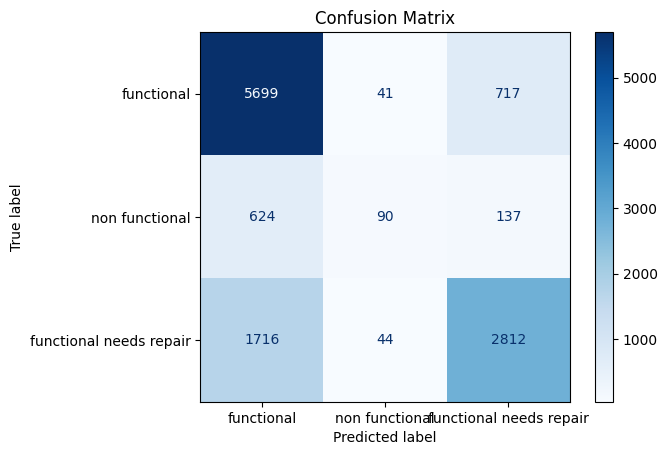

In [ ]:
#NOW working on adding feature combinations and polynomial features

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming you have the DataFrame 'X_final' (features) and 'y' (target variable)

# Step 1: Identify numerical features in the top k features
numerical_features = ['quantity', 'quantity_group']  # Adjust based on your feature types

# Step 2: One-hot encode categorical features
categorical_cols = [feature for feature in top_k_features if feature not in numerical_features]
X_encoded = pd.get_dummies(X_final[top_k_features], columns=categorical_cols, drop_first=True)

# Step 3: Apply selective polynomial feature combinations for numerical features
# Only combine 'quantity' and 'quantity_group' since they are related
polynomial_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Select only the numerical features for transformation
X_poly = X_encoded[numerical_features]

# Apply polynomial feature transformation (interaction terms only)
X_poly_transformed = polynomial_features.fit_transform(X_poly)

# Create a DataFrame for the transformed polynomial features
X_poly_df = pd.DataFrame(X_poly_transformed, columns=polynomial_features.get_feature_names_out(numerical_features))


# Step 4: Add meaningful feature combinations manually (based on domain knowledge)
# Example: Combining 'source' with 'waterpoint_type', or 'extraction_type' with 'quality_group'
# Region and Waterpoint Type Interactions

# Waterpoint Type with Region Interactions

X_encoded['region_quality_interaction_2'] = X_encoded['region_3.0'] * X_encoded['quantity_group']+ X_encoded['region_2.0'] * X_encoded['quantity_group']
X_encoded['multi_region_waterpoint'] = X_encoded['region_2.0'] * X_encoded['waterpoint_type_5.0'] + X_encoded['region_3.0'] * X_encoded['waterpoint_type_1.0'] + + X_encoded['region_1.0'] * X_encoded['waterpoint_type_1.0'] ++ X_encoded['region_4.0'] * X_encoded['waterpoint_type_2.0']
X_encoded['quality_extraction_interaction'] = X_encoded['quantity_group'] * X_encoded['extraction_type_3.0']

# Add the transformed polynomial features back to the original encoded dataframe
X_encoded_poly = X_encoded.drop(columns=numerical_features).join(X_poly_df)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_poly)

# Print the feature names used after scaling
print("Features used after scaling:")
print(X_encoded_poly.columns.tolist())

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Train Logistic Regression Model
linear_model = LogisticRegression(max_iter=1000)
linear_model.fit(X_train, y_train)

# Step 9: Evaluate the Model
y_pred = linear_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 10: Print Accuracy
print(f"Accuracy of Logistic Regression model With Selective Feature Combinations: {accuracy:.4f}")


#Detailed classification report (precision, recall, F1-score per class)
print("\nClassification Report (Precision, Recall, F1-Score per class):")
report = classification_report(y_test, y_pred, zero_division=0)

print(report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['functional', 'non functional', 'functional needs repair'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()